In [ ]:
 # 라이브러리를 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#데이터를 로드
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
df.head(5)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges TotalCharges Churn  
customerID                                     
7590-VHVEG           29.85        29.85    No  
5575-GNVDE           56.95       1889.5    No  
3668-QPYBK           53.85       108.15   Yes  
7795-CFOCW           42.30      1840.75    No  
9237-HQITU           70.70       151.65   Yes

In [ ]:

#df.info()  TotalCharge-> 수치형 변수로 변환, SeniorCitizen -> 명목형 변수로 변환
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = "coerce")
df['Churn'].replace(to_replace='Yes',value=1,inplace=True)
df['Churn'].replace(to_replace='No',value=0,inplace=True)


total_charge = df['TotalCharges']
True == 1
sum=0
for i in total_charge.isna():
    sum = sum+i
sum #total_charge 결측치 11개 존재

11

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

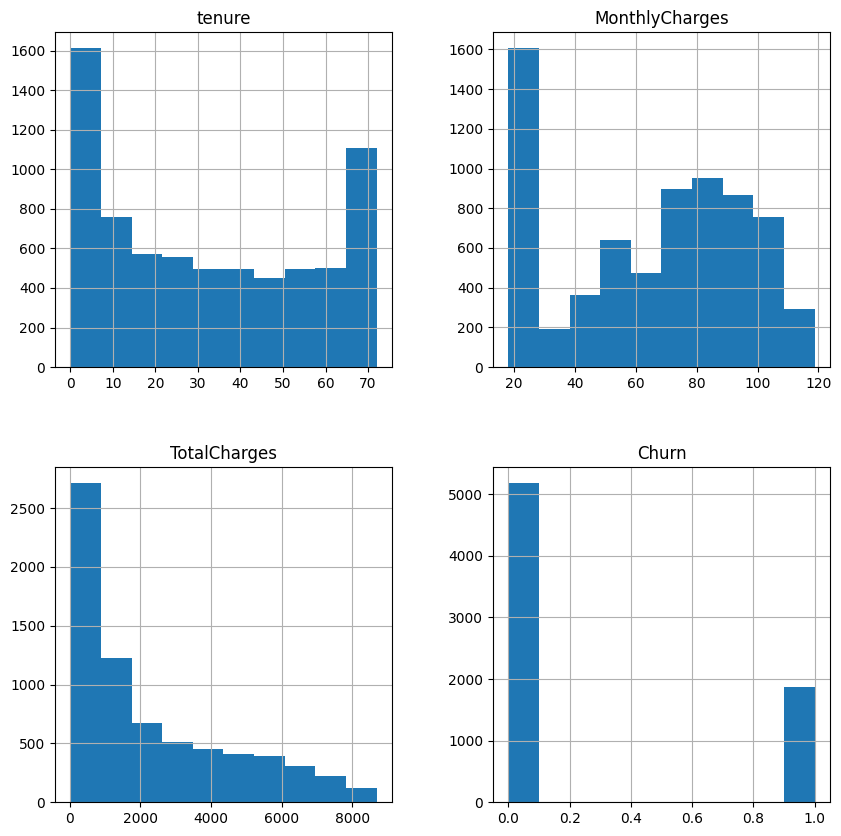

In [ ]:
#수치형 데이터들의 분포 살펴보기 -> 분포가 정규분포를 따르지 않을 알 수 있음, 이는 예측 모형에 악영향을 끼칠 수 있음
df.hist(figsize = (10,10),bins = 10)

# Q1. 데이터셋을 학습 데이터와 평가 데이터셋으로 나누어주세요
- 예측해야하는 결과값은 "Churn" 컬럼입니다.
- 학습에 사용하는 컬럼은 수치형 데이터만 사용합니다.


In [ ]:
#TotalCharges의 분포를 고려하여 결측치를 평균이 아닌 중앙값으로 대체 method 1
#median_value = df['TotalCharges'].median() #1397.475
#df['TotalCharges'] =df['TotalCharges'].fillna(median_value)
#df.info()

#TotalCharges의 결측치가 많지 않아 결측치를 제거 method 2
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [ ]:
# 범주형 변수를 인코딩 하기전 동일한 의미를 나타내는, 형태가 다른 단어가 있는지를 확인(ex man,Man)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for i in categorical_cols:
   print(df[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of Label Encoder.
le = LabelEncoder()

# 데이터 타입이 object인 열들만 추출
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Categorical 열을 Label Encoder를 이용해 numerical로 변경
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
7590-VHVEG       0              0        1           0       1             0   
5575-GNVDE       1              0        0           0      34             1   
3668-QPYBK       1              0        0           0       2             1   
7795-CFOCW       1              0        0           0      45             0   
9237-HQITU       0              0        0           0       2             1   

            MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
customerID                                                                 
7590-VHVEG              1                0               0             2   
5575-GNVDE              0                0               2             0   
3668-QPYBK              0                0               2             2   
7795-CFOCW              1                0               2             0   
9237-HQITU              0                1               0             0   

            DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
customerID                                                                
7590-VHVEG                 0            0            0                0   
5575-GNVDE                 2            0            0                0   
3668-QPYBK                 0            0            0                0   
7795-CFOCW                 2            2            0                0   
9237-HQITU                 0            0            0                0   

            Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
customerID                                                              
7590-VHVEG         0                 1              2           29.85   
5575-GNVDE         1                 0              3           56.95   
3668-QPYBK         0                 1              3           53.85   
7795-CFOCW         1                 0              0           42.30   
9237-HQITU         0                 1              2           70.70   

            TotalCharges  Churn  
customerID                       
7590-VHVEG         29.85      0  
5575-GNVDE       1889.50      0  
3668-QPYBK        108.15      1  
7795-CFOCW       1840.75      0  
9237-HQITU        151.65      1

In [ ]:
df.head(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
7590-VHVEG       0              0        1           0       1             0   
5575-GNVDE       1              0        0           0      34             1   
3668-QPYBK       1              0        0           0       2             1   
7795-CFOCW       1              0        0           0      45             0   
9237-HQITU       0              0        0           0       2             1   
9305-CDSKC       0              0        0           0       8             1   
1452-KIOVK       1              0        0           1      22             1   
6713-OKOMC       0              0        0           0      10             0   
7892-POOKP       0              0        1           0      28             1   
6388-TABGU       1              0        0           1      62             1   

            MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
customerID                                                                 
7590-VHVEG              1                0               0             2   
5575-GNVDE              0                0               2             0   
3668-QPYBK              0                0               2             2   
7795-CFOCW              1                0               2             0   
9237-HQITU              0                1               0             0   
9305-CDSKC              2                1               0             0   
1452-KIOVK              2                1               0             2   
6713-OKOMC              1                0               2             0   
7892-POOKP              2                1               0             0   
6388-TABGU              0                0               2             2   

            DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
customerID                                                                
7590-VHVEG                 0            0            0                0   
5575-GNVDE                 2            0            0                0   
3668-QPYBK                 0            0            0                0   
7795-CFOCW                 2            2            0                0   
9237-HQITU                 0            0            0                0   
9305-CDSKC                 2            0            2                2   
1452-KIOVK                 0            0            2                0   
6713-OKOMC                 0            0            0                0   
7892-POOKP                 2            2            2                2   
6388-TABGU                 0            0            0                0   

            Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
customerID                                                              
7590-VHVEG         0                 1              2           29.85   
5575-GNVDE         1                 0              3           56.95   
3668-QPYBK         0                 1              3           53.85   
7795-CFOCW         1                 0              0           42.30   
9237-HQITU         0                 1              2           70.70   
9305-CDSKC         0                 1              2           99.65   
1452-KIOVK         0                 1              1           89.10   
6713-OKOMC         0                 0              3           29.75   
7892-POOKP         0                 1              2          104.80   
6388-TABGU         1                 0              0           56.15   

            TotalCharges  Churn  
customerID                       
7590-VHVEG         29.85      0  
5575-GNVDE       1889.50      0  
3668-QPYBK        108.15      1  
7795-CFOCW       1840.75      0  
9237-HQITU        151.65      1  
9305-CDSKC        820.50      1  
1452-KIOVK       1949.40      0  
6713-OKOMC        301.90      0  
7892-POOKP       304

In [ ]:
split_count=int(df.shape[0]*0.8)
split_count

5625

In [ ]:
train=df[:split_count].copy()
train

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
7590-VHVEG       0              0        1           0       1             0   
5575-GNVDE       1              0        0           0      34             1   
3668-QPYBK       1              0        0           0       2             1   
7795-CFOCW       1              0        0           0      45             0   
9237-HQITU       0              0        0           0       2             1   
...            ...            ...      ...         ...     ...           ...   
5028-HTLJB       1              1        0           0       1             1   
9801-GDWGV       0              0        0           0      39             1   
6542-LWGXJ       1              0        1           0       3             0   
5567-GZKQY       1              0        0           0      58             1   
1222-LRYKO       1              0        0           1       6             1   

            MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
customerID                                                                 
7590-VHVEG              1                0               0             2   
5575-GNVDE              0                0               2             0   
3668-QPYBK              0                0               2             2   
7795-CFOCW              1                0               2             0   
9237-HQITU              0                1               0             0   
...                   ...              ...             ...           ...   
5028-HTLJB              0                2               1             1   
9801-GDWGV              2                1               0             2   
6542-LWGXJ              1                0               0             0   
5567-GZKQY              0                2               1             1   
1222-LRYKO              2                2               1             1   

            DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
customerID                                                                
7590-VHVEG                 0            0            0                0   
5575-GNVDE                 2            0            0                0   
3668-QPYBK                 0            0            0                0   
7795-CFOCW                 2            2            0                0   
9237-HQITU                 0            0            0                0   
...                      ...          ...          ...              ...   
5028-HTLJB                 1            1            1                1   
9801-GDWGV                 2            0            2                2   
6542-LWGXJ                 0            0            0                0   
5567-GZKQY                 1            1            1                1   
1222-LRYKO                 1            1            1                1   

            Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
customerID                                                              
7590-VHVEG         0                 1              2           29.85   
5575-GNVDE         1                 0              3           56.95   
3668-QPYBK         0                 1              3           53.85   
7795-CFOCW         1                 0              0           42.30   
9237-HQITU         0                 1              2           70.70   
...              ...               ...            ...             ...   
5028-HTLJB         0                 0              3           20.05   
9801-GDWGV         0                 1              2          103.45   
6542-LWGXJ         0                 0              3           25.00   
5567-GZKQY         2                 0              1           20.30   
1222-LRYKO         0                 0              3           26.35   

            TotalCharges  Churn  
customerID            

In [ ]:
train=df[:split_count].copy()
train.shape

(5625, 20)

In [ ]:
test=df[split_count:].copy()
test.shape

(1407, 20)

In [ ]:
feature_names=train.columns[:-1].tolist()
feature_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [ ]:
label_name=train.columns[-1]
label_name

'Churn'

In [ ]:
X_train=train[feature_names]
print(X_train.shape)
X_train.head()

(5625, 19)


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
7590-VHVEG       0              0        1           0       1             0   
5575-GNVDE       1              0        0           0      34             1   
3668-QPYBK       1              0        0           0       2             1   
7795-CFOCW       1              0        0           0      45             0   
9237-HQITU       0              0        0           0       2             1   

            MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
customerID                                                                 
7590-VHVEG              1                0               0             2   
5575-GNVDE              0                0               2             0   
3668-QPYBK              0                0               2             2   
7795-CFOCW              1                0               2             0   
9237-HQITU              0                1               0             0   

            DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
customerID                                                                
7590-VHVEG                 0            0            0                0   
5575-GNVDE                 2            0            0                0   
3668-QPYBK                 0            0            0                0   
7795-CFOCW                 2            2            0                0   
9237-HQITU                 0            0            0                0   

            Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
customerID                                                              
7590-VHVEG         0                 1              2           29.85   
5575-GNVDE         1                 0              3           56.95   
3668-QPYBK         0                 1              3           53.85   
7795-CFOCW         1                 0              0           42.30   
9237-HQITU         0                 1              2           70.70   

            TotalCharges  
customerID                
7590-VHVEG         29.85  
5575-GNVDE       1889.50  
3668-QPYBK        108.15  
7795-CFOCW       1840.75  
9237-HQITU        151.65

In [ ]:
y_train=train[label_name]
print(y_train.shape)
y_train.head()

(5625,)


customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
Name: Churn, dtype: int64

In [ ]:
X_test=test[feature_names]
print(X_train.shape)
X_test.head()

(5625, 19)


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
customerID                                                                     
2320-JRSDE       0              0        1           1       1             1   
2087-QAREY       0              0        1           0      22             1   
0601-WZHJF       1              0        1           0      14             0   
4423-JWZJN       1              0        1           1      64             1   
5143-WMWOG       1              0        0           0       1             1   

            MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
customerID                                                                 
2320-JRSDE              0                2               1             1   
2087-QAREY              0                0               0             2   
0601-WZHJF              1                0               0             0   
4423-JWZJN              2                1               0             0   
5143-WMWOG              0                2               1             1   

            DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
customerID                                                                
2320-JRSDE                 1            1            1                1   
2087-QAREY                 2            0            0                0   
0601-WZHJF                 0            0            2                2   
4423-JWZJN                 2            0            0                2   
5143-WMWOG                 1            1            1                1   

            Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
customerID                                                              
2320-JRSDE         0                 1              2           19.90   
2087-QAREY         0                 1              3           54.70   
0601-WZHJF         0                 0              2           46.35   
4423-JWZJN         1                 0              1           90.25   
5143-WMWOG         0                 0              2           19.95   

            TotalCharges  
customerID                
2320-JRSDE         19.90  
2087-QAREY       1178.75  
0601-WZHJF        667.70  
4423-JWZJN       5629.15  
5143-WMWOG         19.95

In [ ]:
y_test=test[label_name]

print(y_test.shape)
y_test.head()

(1407,)


customerID
2320-JRSDE    1
2087-QAREY    0
0601-WZHJF    1
4423-JWZJN    0
5143-WMWOG    1
Name: Churn, dtype: int64

# Q2. 머신러닝 알고리즘 모델로 학습과 예측을 해주세요
- DecisionTree 알고리즘을 사용하세요.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_predict=model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0])

# Q3. 모델의 정확도를 측정하고, 피처의 중요도를 시각화하세요.
- 모델의 정확도를 2가지 이상의 방법으로 측정하세요.
- 피처의 중요도 시각화는 어떤 방식으로 해도 좋습니다.

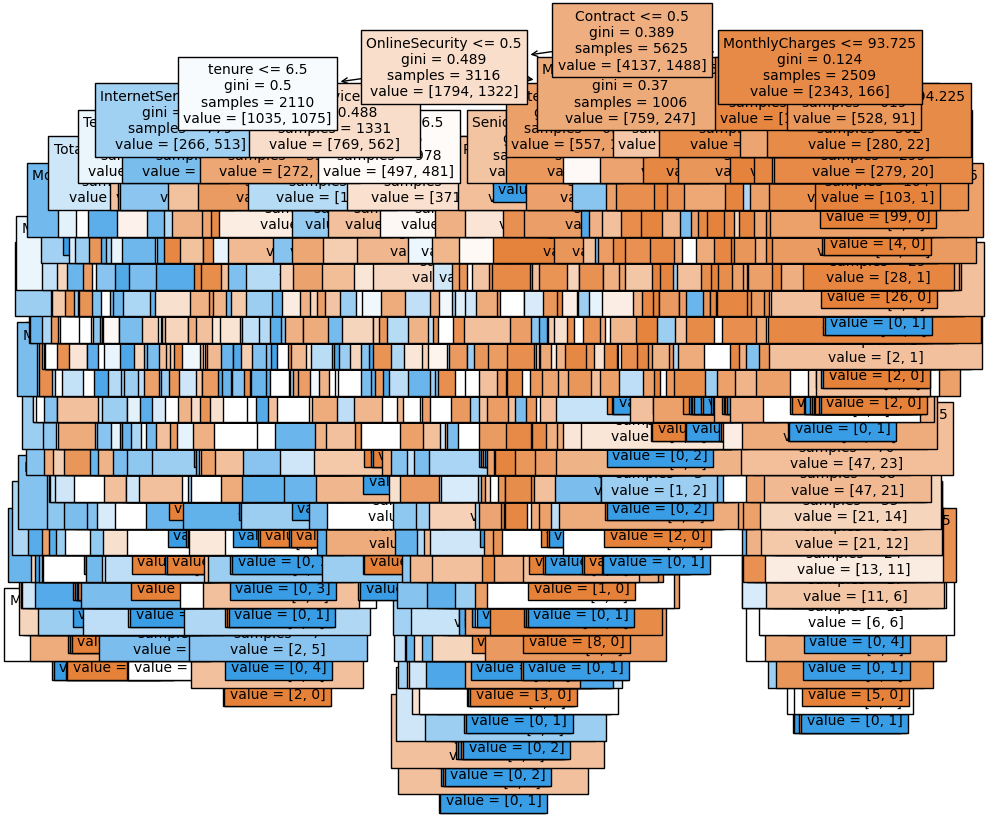

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
tree=plot_tree(model,
               feature_names=feature_names,
               filled=True,
               fontsize=10)

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree=export_graphviz(model,
                         feature_names=feature_names,
                         filled=True)
graphviz.Source(dot_tree)

In [ ]:
model.feature_importances_

array([0.02589605, 0.01622618, 0.01752479, 0.02299764, 0.10638853,
       0.00310991, 0.01602151, 0.02559434, 0.04566255, 0.0136198 ,
       0.01351759, 0.018799  , 0.01031852, 0.00888482, 0.16822916,
       0.02583405, 0.04959522, 0.21145378, 0.20032655])

<Axes: >

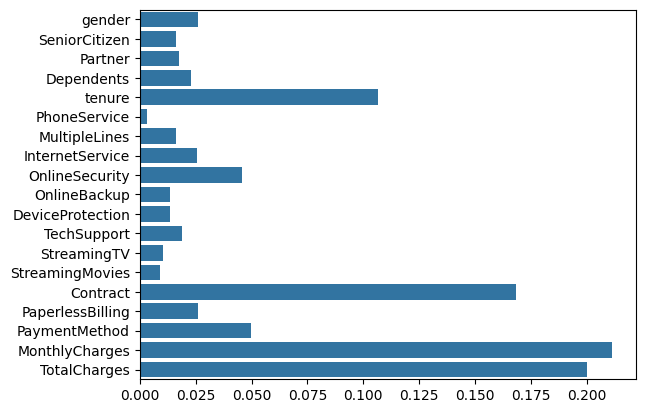

In [ ]:
sns.barplot(x=model.feature_importances_,y=feature_names)

In [ ]:
diff_count=abs(y_test-y_predict).sum()
diff_count

369

In [ ]:
(len(y_test)-diff_count)/len(y_test)*100

73.77398720682304

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)*100

73.77398720682304